In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from os import listdir
from scipy import ndimage, misc
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Input, Dense ,Conv2D,MaxPooling2D ,Dropout, Activation
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, Conv2D, MaxPooling2D, UpSampling2D, Input, concatenate

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/ground_truth.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
HR=[]
path =r"/tmp/ground_truth"
for i in os.listdir(path):
    if i == '51':
        break
    else:
        img = cv2.imread(path + '/'+i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img.astype('float32') / 255.0
        print(img.shape)
    HR.append(img)


In [ ]:
sps=31e-9
a = np.linspace(-240, 240, 480)
[X,Y] = np.meshgrid(sps*a,sps*a)
print(X.shape,Y.shape)

(480, 480) (480, 480)


In [ ]:
NA=0.65;
Lambda =  560e-9
eps = 2**-52
k=2*np.pi/Lambda
scale = NA*k
w=480
f0=sps*w*1.22*NA/Lambda;
R = np.sqrt(X**2+Y**2)
PSFo = abs(2*special.jv(1,scale*R+eps)/(scale*R+eps))**2
psf=PSFo

In [ ]:
OTF2d=np.fft.fft2(PSFo);
OTF2dmax = np.max(np.max(abs(OTF2d)))
OTF2d = OTF2d/OTF2dmax
OTFo = abs(np.fft.fftshift(OTF2d))

In [ ]:
L = w
du = L/w
u = np.linspace(-L/2, L/2, w)
v = u

fu = w*np.linspace(-1/(2*du), 1/L, int(1/(2*du)-(1/L))) #spatial frequency coordinates
fv = fu
Fu, Fv = np.meshgrid(fu, fv)

H = np.abs(np.fft.fftshift(np.fft.fft2(psf)))
maxV = np.max(H)
H = H/maxV

In [ ]:
hr=[]
for i in range(0,50):
  gray = cv2.cvtColor(HR[i], cv2.COLOR_BGR2GRAY)
  hr.append(gray)

In [ ]:
hr=np.array(hr)

In [ ]:
DI0T = abs(np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift( np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(hr[0])))*OTFo))) )

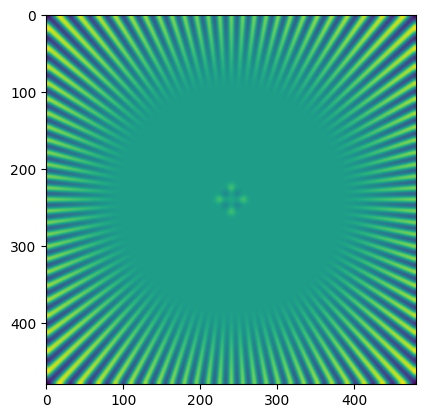

In [ ]:
plt.imshow(DI0T)

In [ ]:
# k2 = 0.70*f0
k2=1.3*f0

In [ ]:
DIo=hr

In [ ]:
DIo.shape

(50, 480, 480)

In [ ]:
p0Ao = 0*np.pi/3
p0Ap = 2*np.pi/3
p0Am = 4*np.pi/3
p0Bo = 0*np.pi/3
p0Bp = 2*np.pi/3
p0Bm = 4*np.pi/3
p0Co = 0*np.pi/3
p0Cp = 2*np.pi/3
p0Cm = 4*np.pi/3

In [ ]:
# Generating raw sim images
# illunination phase shifts along the three directions
psAo = 0*np.pi/3
psAp = 2*np.pi/3
psAm = 4*np.pi/3
psBo = 0*np.pi/3
psBp = 2*np.pi/3
psBm = 4*np.pi/3
psCo = 0*np.pi/3
psCp = 2*np.pi/3
psCm = 4*np.pi/3

## Illuminating patterns
alpha = 0*np.pi/6
## orientation direction of illumination patterns
thetaA = 0*np.pi/3 + alpha
thetaB = 1*np.pi/3 + alpha
thetaC = 2*np.pi/3 + alpha

In [ ]:
import numpy as np
Uo=DIo
w = Uo.shape[1]
wo = w/2
x = np.linspace(0,w-1,w)
y = np.linspace(0,w-1,w)
X,Y = np.meshgrid(x,y)



alpha = 0*np.pi/6
# orientation direction of illumination patterns
thetaA = 0*np.pi/3 + alpha
thetaB = 1*np.pi/3 + alpha
thetaC = 2*np.pi/3 + alpha

# illumination frequency vectors
k2a = (k2/(w))*np.array([np.cos(thetaA), np.sin(thetaA)])
k2b = (k2/(w))*np.array([np.cos(thetaB), np.sin(thetaB)])
k2c = (k2/(w))*np.array([np.cos(thetaC), np.sin(thetaC)])

# mean illumination intensity
mA = 0.5
mB = 0.5
mC = 0.5

ModFac = 0.8
# amplitude of illumination intensity above mean
aA = 0.5*ModFac
aB = 0.5*ModFac
aC = 0.5*ModFac

# illunination patterns
sAo = mA + aA*np.cos(2*np.pi*(k2a[0]*(X-wo)+k2a[1]*(Y-wo))+p0Ao)
# figure
# imshow(sAo,[])
# impixelinfo
sAp = mA + aA*np.cos(2*np.pi*(k2a[0]*(X-wo)+k2a[1]*(Y-wo))+p0Ap)
sAm = mA + aA*np.cos(2*np.pi*(k2a[0]*(X-wo)+k2a[1]*(Y-wo))+p0Am)
sBo = mB + aB*np.cos(2*np.pi*(k2b[0]*(X-wo)+k2b[1]*(Y-wo))+p0Bo)
# figure
# imshow(sBo,[])
# impixelinfo
sBp = mB + aB*np.cos(2*np.pi*(k2b[0]*(X-wo)+k2b[1]*(Y-wo))+p0Bp)
sBm = mB + aB*np.cos(2*np.pi*(k2b[0]*(X-wo)+k2b[1]*(Y-wo))+p0Bm)
sCo = mC + aC*np.cos(2*np.pi*(k2c[0]*(X-wo)+k2c[1]*(Y-wo))+p0Co)
# figure
# imshow(sCo,[])
# impixelinfo
sCp = mC + aC*np.cos(2*np.pi*(k2c[0]*(X-wo)+k2c[1]*(Y-wo))+p0Cp)
sCm = mC + aC*np.cos(2*np.pi*(k2c[0]*(X-wo)+k2c[1]*(Y-wo))+p0Cm)

In [ ]:
s1a = Uo * sAo # superposed signal (0 phase)
s2a = Uo * sAp # superposed signal (+ phase)
s3a = Uo * sAm # superposed signal (- phase)
s1b = Uo * sBo
s2b = Uo * sBp
s3b = Uo * sBm
s1c = Uo * sCo
s2c = Uo * sCp
s3c = Uo * sCm

# propagated raw SIM images
DIoT = np.fft.ifft2( np.fft.fft2(DIo)*np.fft.fftshift(H) )
S1aT = np.fft.ifft2( np.fft.fft2(s1a)*np.fft.fftshift(H) )
S2aT = np.fft.ifft2( np.fft.fft2(s2a)*np.fft.fftshift(H) )
S3aT = np.fft.ifft2( np.fft.fft2(s3a)*np.fft.fftshift(H) )
S1bT = np.fft.ifft2( np.fft.fft2(s1b)*np.fft.fftshift(H) )
S2bT = np.fft.ifft2( np.fft.fft2(s2b)*np.fft.fftshift(H) )
S3bT = np.fft.ifft2( np.fft.fft2(s3b)*np.fft.fftshift(H) )
S1cT = np.fft.ifft2( np.fft.fft2(s1c)*np.fft.fftshift(H) )
S2cT = np.fft.ifft2( np.fft.fft2(s2c)*np.fft.fftshift(H) )
S3cT = np.fft.ifft2( np.fft.fft2(s3c)*np.fft.fftshift(H) )


In [ ]:
DIoT = DIoT.real
S1aT = S1aT.real
S2aT = S2aT.real
S3aT = S3aT.real
S1bT = S1bT.real
S2bT = S2bT.real
S3bT = S3bT.real
S1cT = S1cT.real
S2cT = S2cT.real
S3cT = S3cT.real

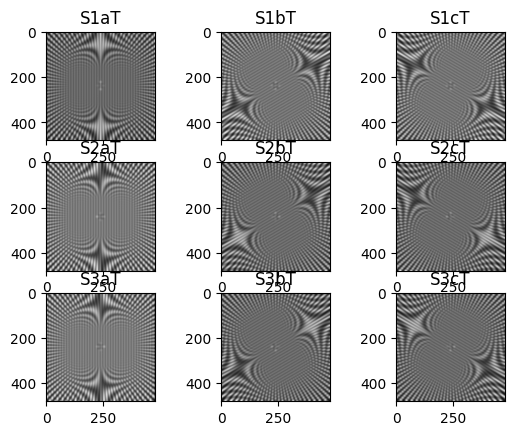

In [ ]:
fig, ax = plt.subplots(3,3)
ax[0][0].imshow(S1aT[0], cmap="gray")
ax[0][0].set_title('S1aT')
ax[1][0].imshow(S2aT[0], cmap="gray")
ax[1][0].set_title('S2aT')
ax[2][0].imshow(S3aT[0], cmap="gray")
ax[2][0].set_title('S3aT')
ax[0][1].imshow(S1bT[0], cmap="gray")
ax[0][1].set_title('S1bT')
ax[1][1].imshow(S2bT[0], cmap="gray")
ax[1][1].set_title('S2bT')
ax[2][1].imshow(S3bT[0], cmap="gray")
ax[2][1].set_title('S3bT')
ax[0][2].imshow(S1cT[0], cmap="gray")
ax[0][2].set_title('S1cT')
ax[1][2].imshow(S2cT[0], cmap="gray")
ax[1][2].set_title('S2cT')
ax[2][2].imshow(S3cT[0], cmap="gray")
ax[2][2].set_title('S3cT')
plt.show()

In [ ]:
num_im = 50      # Number of examples in dataset
frames = 9       # Number of sub-frames per example
im_dim = 480     # Image dimension (after super-res)
bg_lvl = 0       # Optional bg level subtraction

In [ ]:
from tensorflow.keras.layers import ReLU, Conv2D, MaxPooling2D, UpSampling2D, Input, concatenate

In [ ]:
input_frames = np.zeros([num_im,im_dim,im_dim,frames])
gt_frames = np.zeros([num_im,im_dim,im_dim,1])
lr_frames = np.zeros([num_im,im_dim,im_dim,1])
patterns = np.zeros([frames,im_dim,im_dim,1])

In [ ]:
pattern=np.array([sAo,sAm,sAp,sBo,sBm,sBp,sCo,sCm,sCp])
pattern.shape
patterns = pattern.reshape([9,im_dim,im_dim,1])

In [ ]:
lr_frames=DIoT.reshape([50,im_dim,im_dim,1])

In [ ]:
 hr=np.array(hr)
 gt_frames = hr.reshape([50,im_dim,im_dim,1])

In [ ]:
gt_frames.shape

(50, 480, 480, 1)

In [ ]:
for i in range (0,50):
    for j in range (0,9):
        a=gt_frames[i,:,:,0]*patterns[j,:,:,0]
        b=abs(np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift( np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(a)))*OTFo))) )
        input_frames[i,:,:,j]=b

In [ ]:
print(np.amax(input_frames))
input_frames = input_frames - bg_lvl;
input_frames[input_frames<0] = 0
input_frames = input_frames/np.amax(input_frames)
print(np.amax(input_frames))
gt_fames = gt_frames/np.amax(gt_frames)
lr_frames = lr_frames/np.amax(lr_frames)
patterns = patterns/np.amax(patterns)
print(input_frames.shape)
print(gt_frames.shape)

0.4990501051645849
1.0
(50, 480, 480, 9)
(50, 480, 480, 1)


Text(0.5, 1.0, 'Illumination pattern')

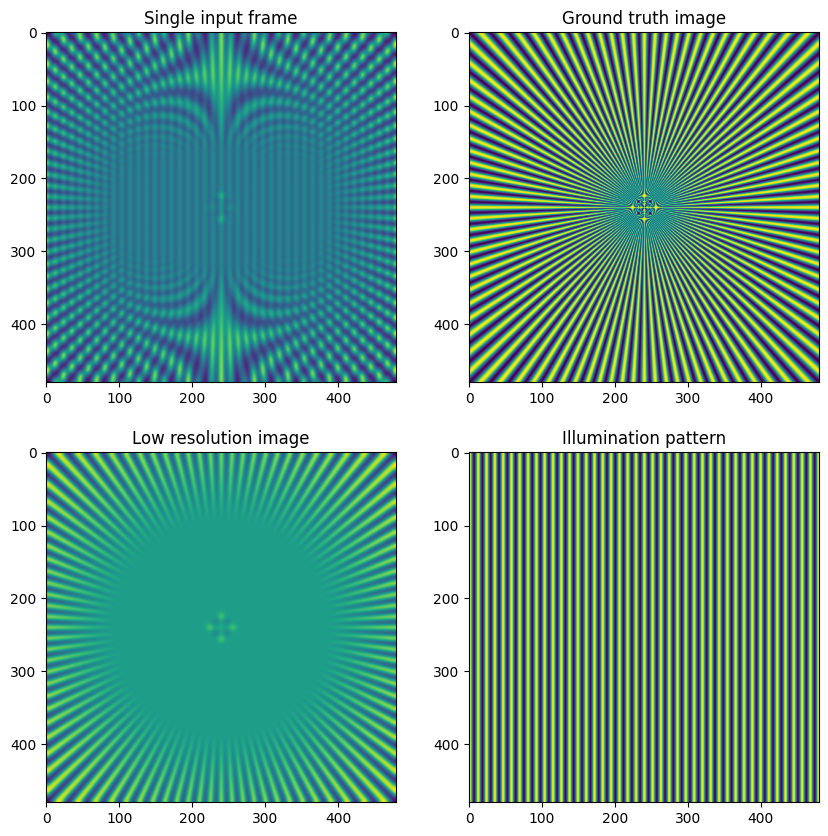

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(input_frames[0,:,:,0])
plt.title('Single input frame')
plt.subplot(2,2,2)
plt.imshow(gt_frames[0,:,:,0])
plt.title('Ground truth image')
plt.subplot(2,2,3)
plt.imshow(lr_frames[0,:,:,0])
plt.title('Low resolution image')
plt.subplot(2,2,4)
plt.imshow(patterns[0,:,:,0])
plt.title('Illumination pattern')

In [ ]:
input_frames_train=input_frames[0:40,:,:,:]
input_frames_test=input_frames[40:,:,:,:]
input_frames_test.shape

(10, 480, 480, 9)

In [ ]:
k_size = 3

def u_net():

    inputs = Input((im_dim,im_dim,frames))
    block1 = Conv2D(32, (k_size, k_size), padding="same", activation = 'relu')(inputs)
    block2 = Conv2D(32, (k_size, k_size), padding="same", activation = 'relu')(block1)
    block2 = Conv2D(32, (k_size, k_size), padding="same", activation = 'relu')(block2)
    down1 = MaxPooling2D(pool_size=(2,2))(block2)
    block3 = Conv2D(64, (k_size, k_size), padding="same", activation = 'relu')(down1)
    block3 = Conv2D(64, (k_size, k_size), padding="same", activation = 'relu')(block3)
    down2 = MaxPooling2D(pool_size=(2,2))(block3)
    block4 = Conv2D(128, (k_size, k_size), padding="same", activation = 'relu')(down2)
    block4 = Conv2D(128, (k_size, k_size), padding="same", activation = 'relu')(block4)
    down3 = MaxPooling2D(pool_size=(2,2))(block4)
    block5 = Conv2D(256, (k_size, k_size), padding="same", activation = 'relu')(down3)
    block5 = Conv2D(256, (k_size, k_size), padding="same", activation = 'relu')(block5)
    up1 = UpSampling2D(size=(2,2))(block5)
    cat1 = concatenate([block4,up1])
    block6 = Conv2D(128, (k_size, k_size), padding="same", activation = 'relu')(cat1)
    block6 = Conv2D(128, (k_size, k_size), padding="same", activation = 'relu')(block6)
    up2 = UpSampling2D(size=(2,2))(block6)
    cat2 = concatenate([block3,up2])
    block7 = Conv2D(64, (k_size, k_size), padding="same", activation = 'relu')(cat2)
    block7 = Conv2D(64, (k_size, k_size), padding="same", activation = 'relu')(block7)
    up3 = UpSampling2D(size=(2,2))(block7)
    cat3 = concatenate([block2,up3])
    block8 = Conv2D(32, (k_size, k_size), padding="same", activation = 'relu')(cat3)
    block8 = Conv2D(32, (k_size, k_size), padding="same", activation = 'relu')(block8)
    block9 = Conv2D(32, (k_size, k_size), padding="same", activation = 'relu')(block8)
    output = Conv2D(1, (1, 1), padding="same")(block9)
    output = tf.keras.layers.ReLU(max_value=1.0)(output)

    model = tf.keras.Model(inputs=[inputs], outputs=[output])

    return model

In [ ]:
model = u_net()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 480, 480, 9  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_17 (Conv2D)             (None, 480, 480, 32  2624        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_18 (Conv2D)             (None, 480, 480, 32  9248        ['conv2d_17[0][0]']              
                                )                                                           

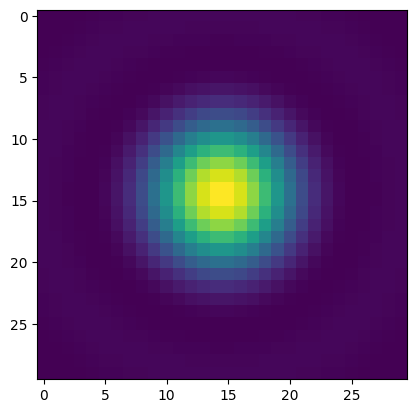

In [ ]:
psf=PSFo[225:255,225:255]
psf.shape
psf=psf.reshape(30,30,1,1)
psf.shape
plt.imshow(psf[:,:,0,0])

In [ ]:
def Physics_Loss(y_true, y_pred):

    loss = 0
    y_pred = tf.transpose(y_pred,(3,1,2,0))
    y_true = tf.transpose(y_true,(3,1,2,0))

    for i in range(0,(batch_size)):

        pred = y_pred[:,:,:,i-1]
        pred = tf.expand_dims(pred,3)
        # multiply predicted object by illumination patterns
        prod = tf.math.multiply(pred,patterns)
        # convolve with PSF
        conv = tf.nn.conv2d(prod,psf,strides=[1,1,1,1],padding='SAME',data_format='NHWC')
        conv = tf.math.divide(tf.math.subtract(conv,tf.reduce_min(conv)),tf.math.subtract(tf.reduce_max(conv),tf.reduce_min(conv)))

        true = y_true[:,:,:,i-1]
        true = tf.expand_dims(true,3)

        im_loss = SSIM_Loss(conv,true)
        loss = loss + im_loss

    return loss

In [ ]:
def SSIM_Loss(y_true, y_pred):
    return (1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0)))

In [ ]:
ind = 23
single_input = input_frames_train[ind-1,:,:,:]
single_input = single_input.reshape([1,im_dim,im_dim,frames])
print(single_input.shape)

(1, 480, 480, 9)


In [ ]:
single_input = single_input.reshape([1,480,480,9])
print(single_input.shape)

(1, 480, 480, 9)


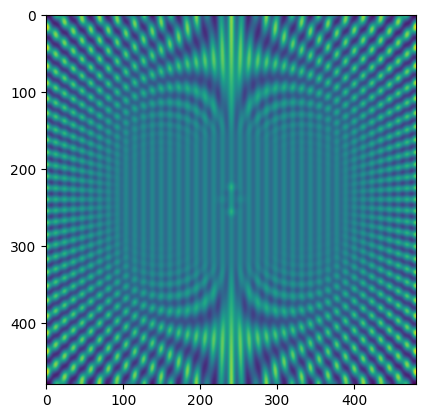

In [ ]:
plt.imshow(single_input[0,:,:,0])

In [ ]:
patterns.shape

(9, 480, 480, 1)

In [ ]:
learning_rate = 0.001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    learning_rate,
    decay_steps=50,
    decay_rate=0.90,
    staircase=True)

opt = tf.keras.optimizers.Adam(lr_schedule)
batch_size = 1
eps = 1000
l = Physics_Loss

model.compile(loss=l, optimizer=opt)
model_history = model.fit(x=single_input,y=single_input,epochs=eps,batch_size=batch_size)

Epoch 1/1000
1/1 [==============================] - 7s 7s/step - loss: 0.9999
Epoch 2/1000
1/1 [==============================] - 0s 171ms/step - loss: 0.9477
Epoch 3/1000
1/1 [==============================] - 0s 123ms/step - loss: 0.3255
Epoch 4/1000
1/1 [==============================] - 0s 119ms/step - loss: 0.3524
Epoch 5/1000
1/1 [==============================] - 0s 115ms/step - loss: 0.2652
Epoch 6/1000
1/1 [==============================] - 0s 120ms/step - loss: 0.2087
Epoch 7/1000
1/1 [==============================] - 0s 115ms/step - loss: 0.6474
Epoch 8/1000
1/1 [==============================] - 0s 117ms/step - loss: 0.2955
Epoch 9/1000
1/1 [==============================] - 0s 113ms/step - loss: 0.3105
Epoch 10/1000
1/1 [==============================] - 0s 116ms/step - loss: 0.3105
Epoch 11/1000
1/1 [==============================] - 0s 113ms/step - loss: 0.3068
Epoch 12/1000
1/1 [==============================] - 0s 116ms/step - loss: 0.3036
Epoch 13/1000
1/1 [=========

In [ ]:
plt.plot(np.linspace(1,eps,num=eps),model_history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Optimization Loss')
plt.subplots_adjust(wspace = 0.5)

In [ ]:
fig.savefig('/content/11.png')   # save the figure to file
plt.close(fig)

1/1 [==============================] - 0s 212ms/step
(1, 480, 480, 1)


Text(0.5, 1.0, 'Diffraction limited image')

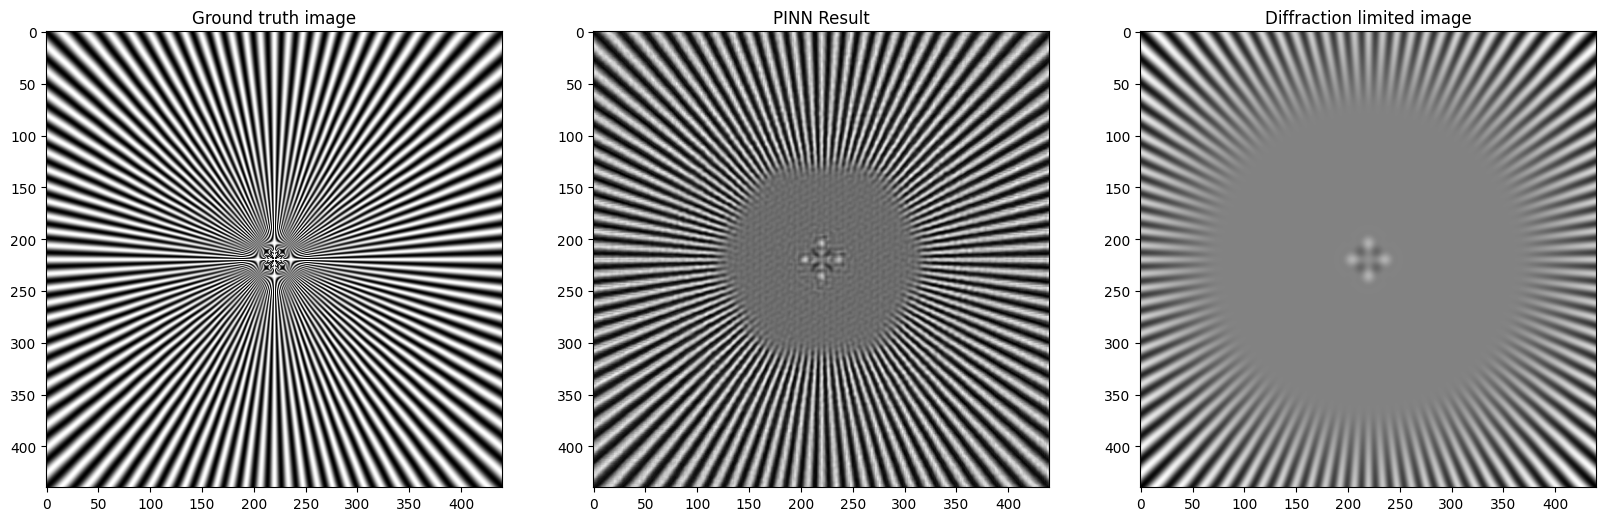

In [ ]:
predicted = model.predict(single_input)

print(predicted.shape)
predicted = predicted.reshape([im_dim,im_dim])
predicted = predicted[20:(im_dim-20),20:(im_dim-20)]
predicted = (predicted-np.amin(predicted))/(np.amax(predicted)-np.amin(predicted))

gt = gt_frames[ind-1,:,:,:]
gt = gt[20:(im_dim-20),20:(im_dim-20)]
gt = (gt-np.amin(gt))/(np.amax(gt)-np.amin(gt))
gt = gt.reshape([(im_dim-40),(im_dim-40)])

lowres = lr_frames[ind-1,:,:,:]
lowres = lowres[20:(im_dim-20),20:(im_dim-20)]
lowres = (lowres-np.amin(lowres))/(np.amax(lowres)-np.amin(lowres))
lowres = lowres.reshape([(im_dim-40),(im_dim-40)])

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(gt,cmap='gray')
plt.title('Ground truth image')
plt.subplot(1,3,2)
plt.imshow(predicted,cmap='gray')
plt.title('PINN Result')
plt.subplot(1,3,3)
plt.imshow(lowres,cmap='gray')
plt.title('Diffraction limited image')

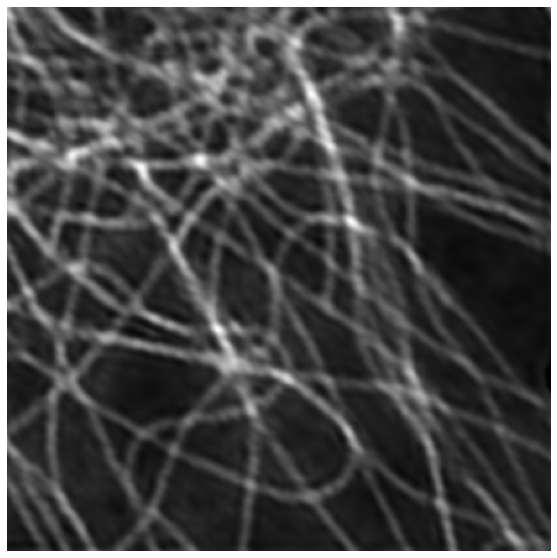

In [ ]:
from google.colab.patches import cv2_imshow
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(predicted,cmap='gray')
plt.savefig('aa1.png')


In [ ]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 0.8
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr
PSNR(gt,predicted)

22.603771118183673

Text(0.5, 1.0, 'Diffraction limited image')

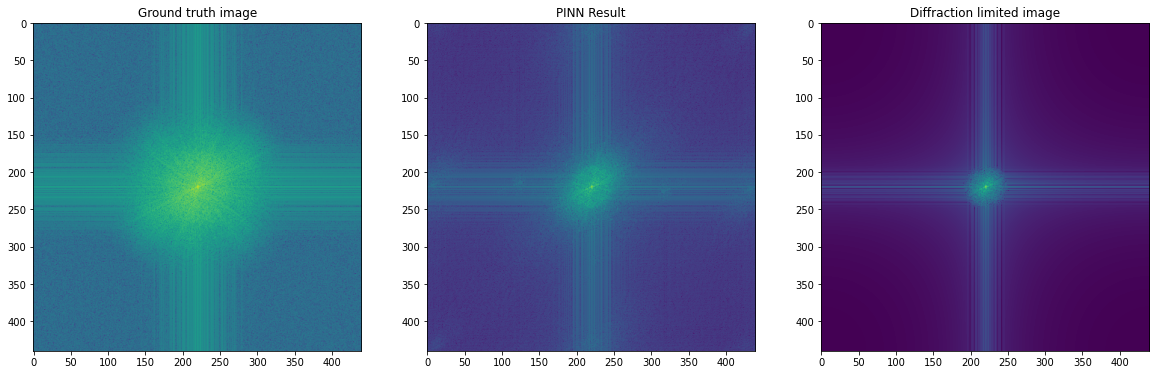

In [ ]:
f=tf.signal.fftshift(tf.signal.fft2d(gt))
g=tf.signal.fftshift(tf.signal.fft2d(lowres))
h=tf.signal.fftshift(tf.signal.fft2d(predicted))


plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(np.log10(abs(f)))
plt.title('Ground truth image')
plt.subplot(1,3,2)
plt.imshow(abs(h)**0.1)
plt.title('PINN Result')
plt.subplot(1,3,3)
plt.imshow(abs(g)**0.1)
plt.title('Diffraction limited image')

1/1 [==============================] - 0s 37ms/step
(1, 480, 480, 1)


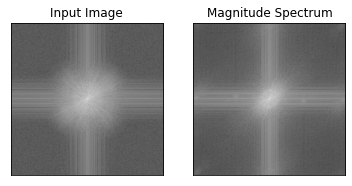

In [ ]:
predicted = model.predict(single_input)

print(predicted.shape)
predicted = predicted.reshape([im_dim,im_dim])
predicted = predicted[20:(im_dim-20),20:(im_dim-20)]
f = np.fft.fft2(predicted)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
f = np.fft.fft2(gt)
fshift = np.fft.fftshift(f)
magnitude_spectrum1 = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(magnitude_spectrum1, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

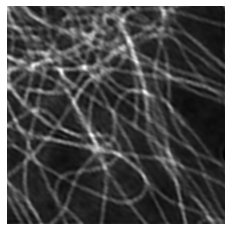

In [ ]:
predicted = predicted.reshape([im_dim,im_dim])
predicted = predicted[20:(im_dim-20),20:(im_dim-20)]
predicted = (predicted-np.amin(predicted))/(np.amax(predicted)-np.amin(predicted))
plt.imshow(predicted,cmap='gray')
plt.axis('off')
plt.savefig('aa1.png')